In [43]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [44]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

## Bank of America

In [4]:
BAC = data.DataReader("BAC", 'yahoo', start, end)

## Citigroup 

In [7]:
C = data.DataReader("C", 'yahoo', start, end)

## Goldman Sachs

In [8]:
GS = data.DataReader("GS", 'yahoo', start, end)

## JPMorgan Chase

In [9]:
JPM = data.DataReader("JPM", 'yahoo', start, end)

## Morgan Stanley

In [10]:
MS = data.DataReader("MS", 'yahoo', start, end)

## Wells Fargo

In [11]:
WFC = data.DataReader("WFC", 'yahoo', start, end)

### Could also do this for a Panel Object

In [17]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

C:\Users\USER\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'JPM', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [18]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [19]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [20]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [21]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.170319  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   32.818035  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   32.860317  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   32.810982  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   32.832119  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  34.886639  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  34.910580  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.006294  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.042194  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.413132  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  19.975796  
2006-01-04   31.799999  31.530001  10870000.0  19.744104  
2006-01-05   31.500000  31.495001  10158000.0  19.722189  
2006-01-06   31.580000  31.680000   8403800.0  19.838036  
2006-01-09   31.674999  31.674999   5619600.0  19.834904  

[5 rows x 36 columns]

## EDA

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [23]:
returns = pd.DataFrame()

In [25]:
for ticks in tickers:
    returns[ticks + 'Return'] = bank_stocks[ticks]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


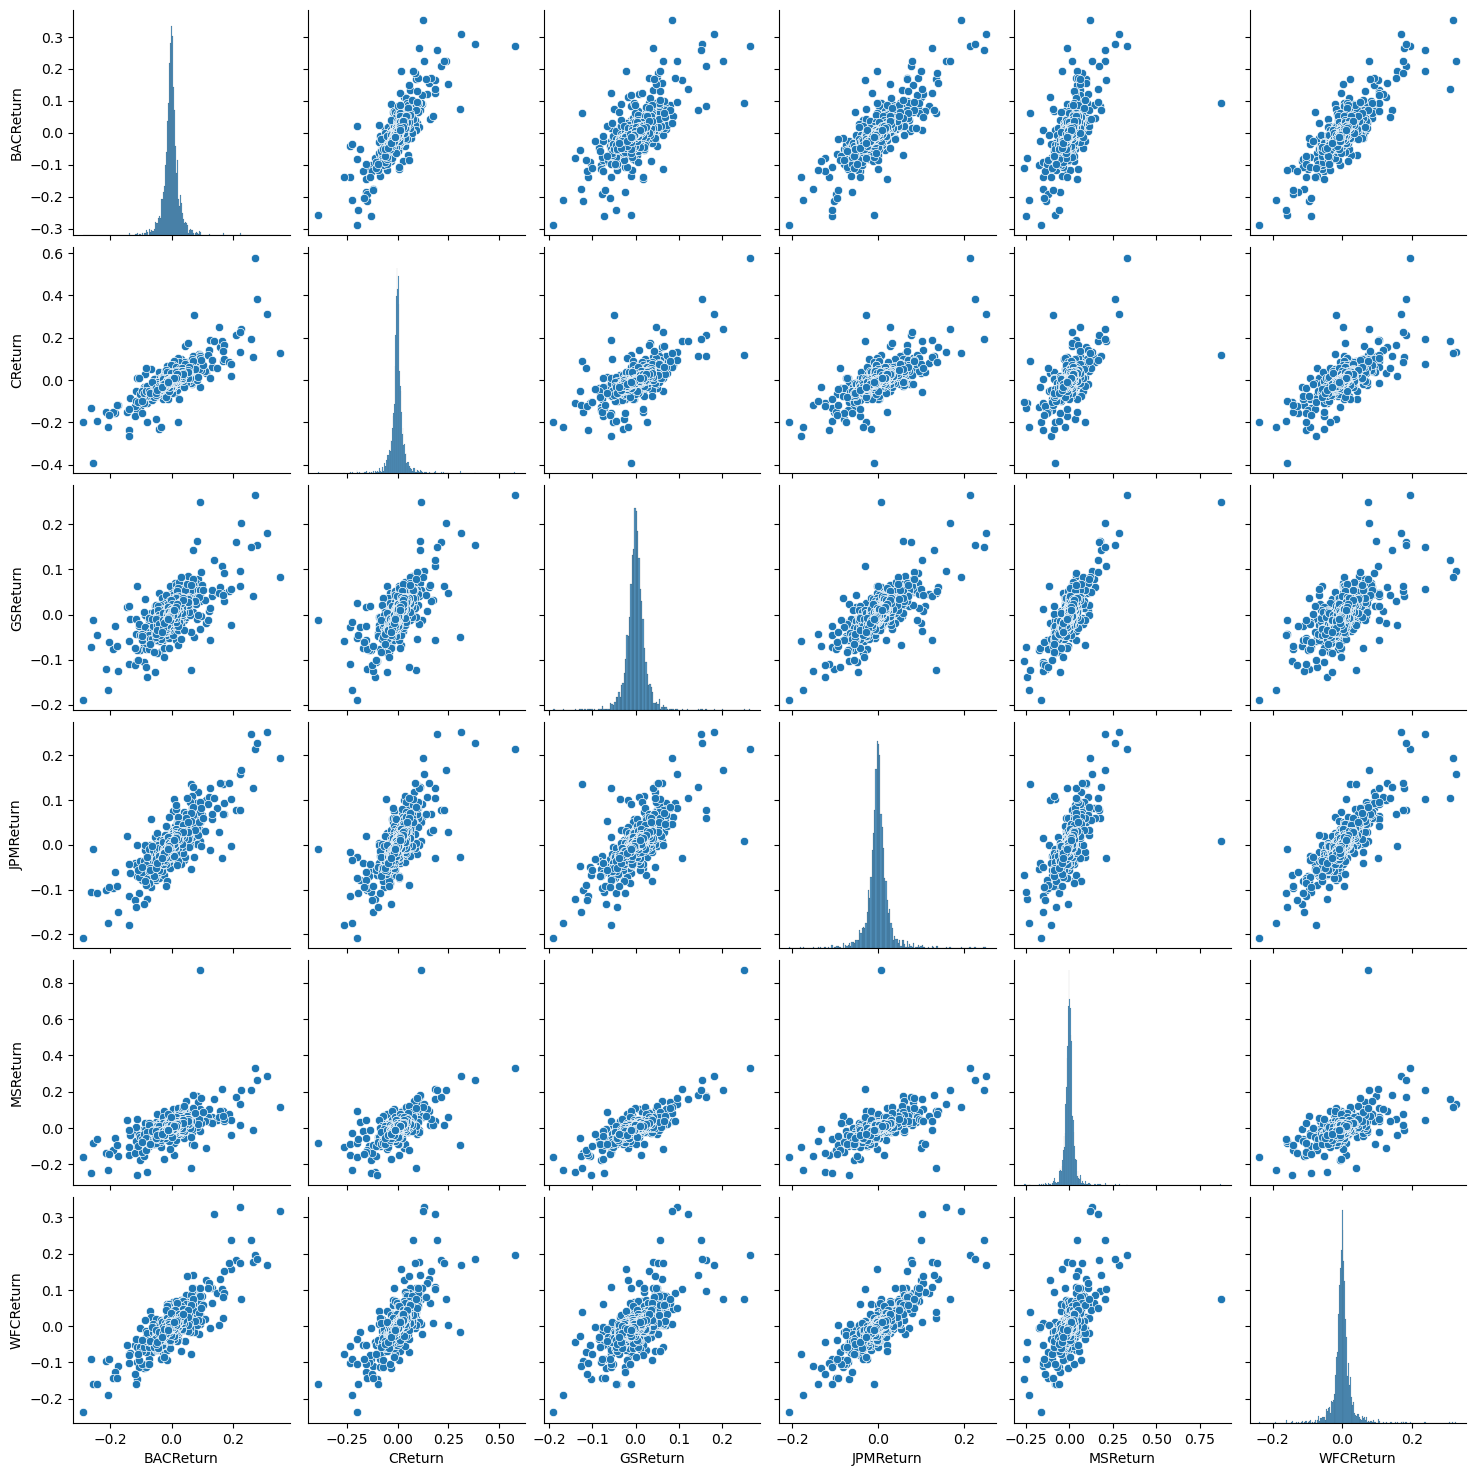

In [26]:
import seaborn as sns 
sns.pairplot(returns[1:])

### Worst Drop (4 of them on Inauguration day)

In [27]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [28]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [34]:
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

### Very similar risk profiles, but Morgan Stanley or BofA

In [49]:
returns.loc['2015-01-01': '2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

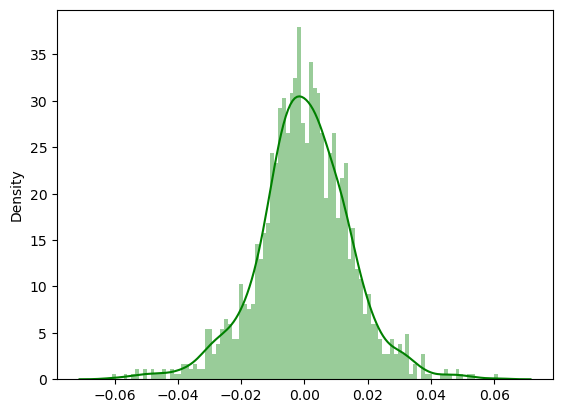

In [65]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31'],color='green',bins=100)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

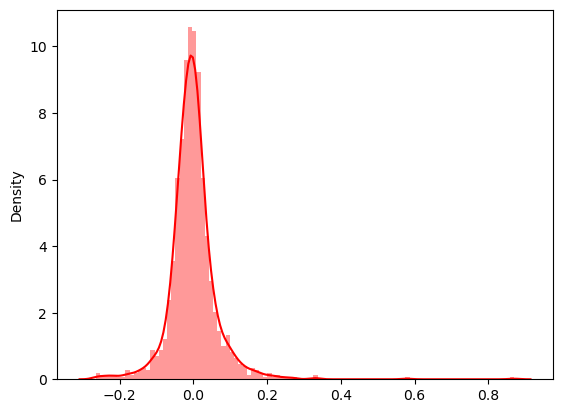

In [68]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31'],color='red',bins=100)

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

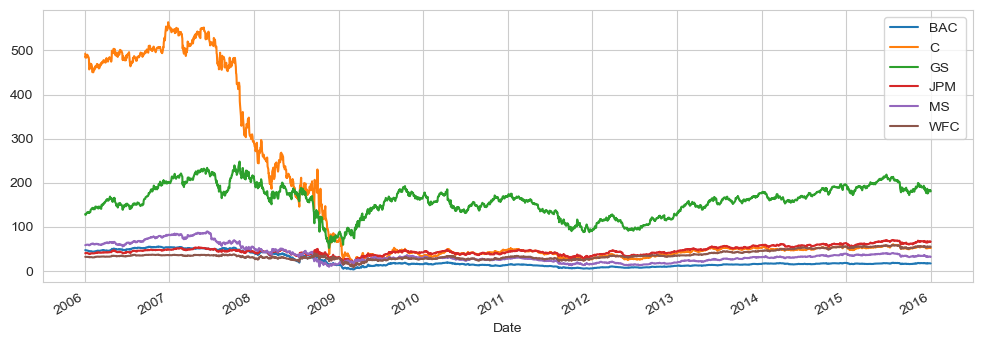

In [74]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

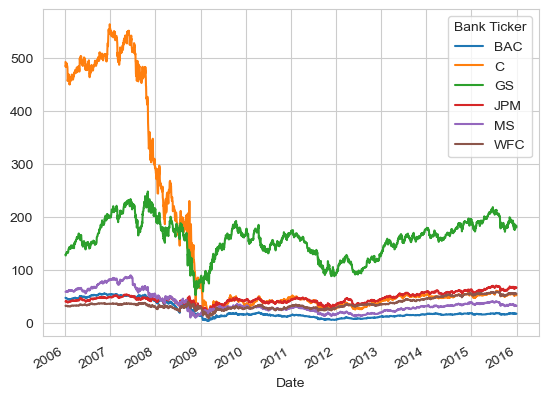

In [75]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [76]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

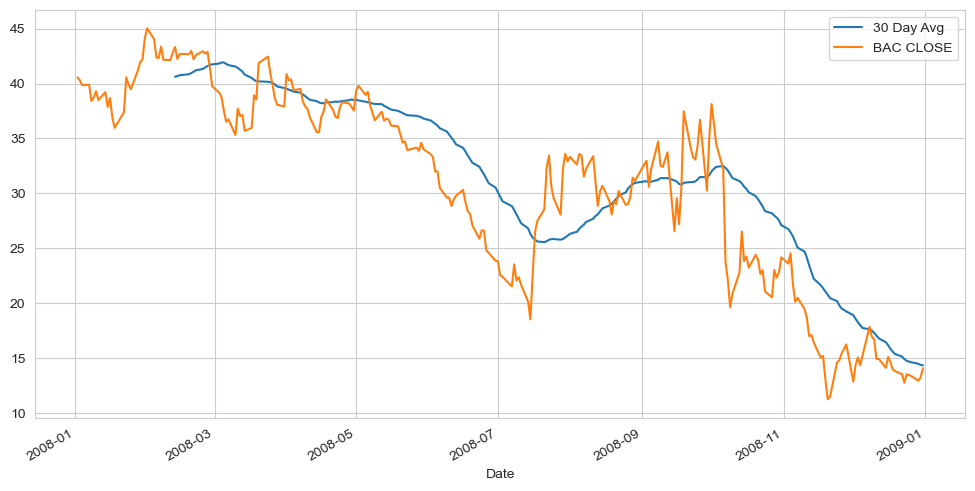

In [78]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

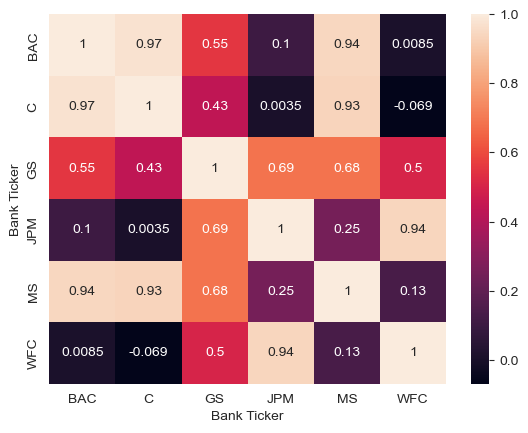

In [79]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

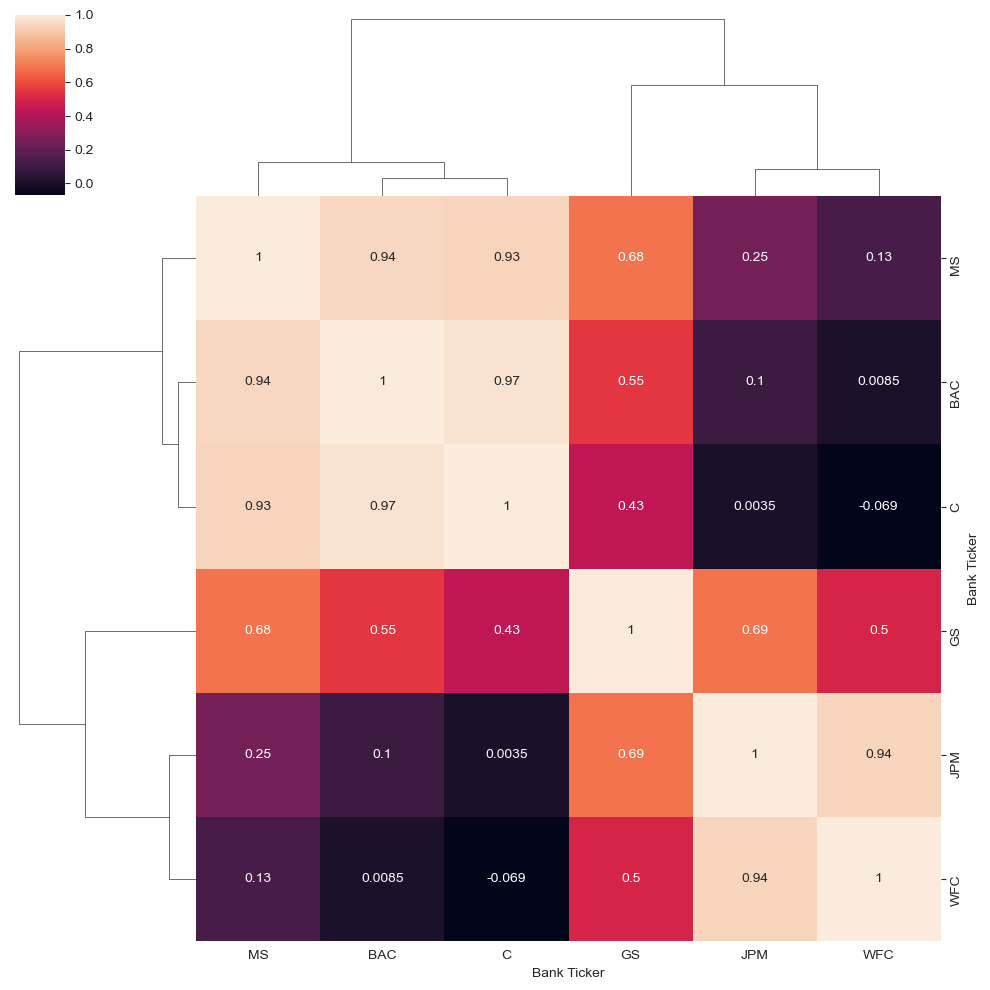

In [80]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [81]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# OPTIONAL

In [84]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [85]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [86]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')